## Ingest data from a csv file

Inspired by http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

Original data source: https://opendata.swiss/de/dataset/anteil-2-zi-wohnungen/resource/ab5f1799-4275-47c3-a14a-ba3d9291b9fb 

In [1]:
import pandas as pd

data = pd.read_csv('../api/data/KANTON_ZUERICH_361.csv', encoding='ANSI')

data.head()

,BFS_NR,GEBIET_NAME,THEMA_NAME,SET_NAME,SUBSET_NAME,INDIKATOR_ID,INDIKATOR_NAME,INDIKATOR_JAHR,INDIKATOR_VALUE,EINHEIT_KURZ,EINHEIT_LANG
0,1,Aeugst a.A.,Bau und Immobilien,"Wohnungen, Wohnbautätigkeit",Wohnungsbestand,361,Anteil 2 Zi.-Wohnungen [%],1990,9.0,%,Prozent
1,1,Aeugst a.A.,Bau und Immobilien,"Wohnungen, Wohnbautätigkeit",Wohnungsbestand,361,Anteil 2 Zi.-Wohnungen [%],1991,8.9,%,Prozent
2,1,Aeugst a.A.,Bau und Immobilien,"Wohnungen, Wohnbautätigkeit",Wohnungsbestand,361,Anteil 2 Zi.-Wohnungen [%],1992,8.7,%,Prozent
3,1,Aeugst a.A.,Bau und Immobilien,"Wohnungen, Wohnbautätigkeit",Wohnungsbestand,361,Anteil 2 Zi.-Wohnungen [%],1993,8.6,%,Prozent
4,1,Aeugst a.A.,Bau und Immobilien,"Wohnungen, Wohnbautätigkeit",Wohnungsbestand,361,Anteil 2 Zi.-Wohnungen [%],1994,8.5,%,Prozent


## Filter data where BFS_NR == Knonau

In [2]:
filtered_data = data[data['GEBIET_NAME'] == 'Knonau']

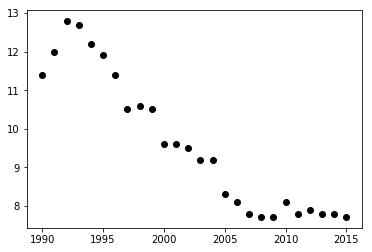

In [3]:
import matplotlib.pyplot as plt

plt.scatter(x=filtered_data['INDIKATOR_JAHR'], y=filtered_data['INDIKATOR_VALUE'], color='black')

# Or using
#filtered_data.plot(x='INDIKATOR_JAHR', y='INDIKATOR_VALUE', style='k.')

plt.show()

## Learn a regression model

### Remove points from the history

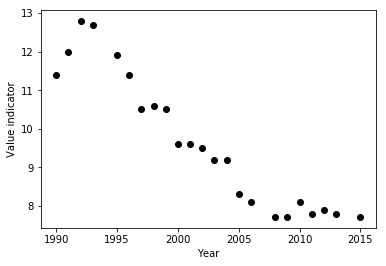

In [4]:
years_removed = [1994, 2007, 2014]
years = [year for year in filtered_data['INDIKATOR_JAHR'] if year not in years_removed] #1990 - 2015

X_train = [[year] for year in years ]
X_test = [[year] for year in years_removed]

Y_train = filtered_data[~filtered_data['INDIKATOR_JAHR'].isin(years_removed)]['INDIKATOR_VALUE']
Y_test = filtered_data[filtered_data['INDIKATOR_JAHR'].isin(years_removed)]['INDIKATOR_VALUE']

plt.scatter(x=years, y=Y_train, color='black')
plt.xlabel('Year')
plt.ylabel('Value indicator')
plt.show()

### Learn the model

In [5]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
Y_pred = regr.predict(X_train)

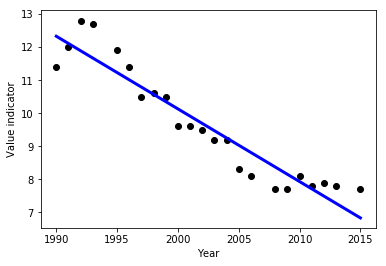

In [7]:
plt.scatter(x=years, y=Y_train, color='black')
plt.plot(years, Y_pred, color='blue', linewidth=3)
plt.xlabel('Year')
plt.ylabel('Value indicator')
plt.show()

In [8]:
print('Coefficients: ', regr.coef_)

Coefficients:  [-0.21995284]


   ### Predict for the years removed

In [9]:
Y_pred = [regr.predict(year)[0] for year in years_removed]
Y_pred

[11.450049274954267, 8.5906623961706146, 7.0509925383640848]

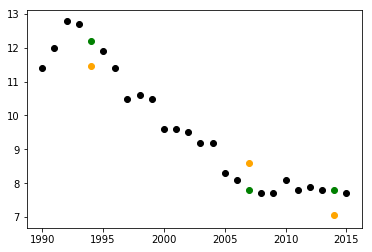

In [10]:
plt.scatter(x=years, y=Y_train, color='black')
plt.scatter(x=years_removed, y=Y_pred, color='orange')
plt.scatter(x=X_test, y=Y_test, color='green')
plt.show()

## Predict for 2016

In [11]:
indikator_2016 = regr.predict(2016)
print(indikator_2016)

[ 6.61108686]


## Evaluating the model

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
print("Variance score: %.2f" % r2_score(Y_test, Y_pred))

Mean squared error: 0.58
Variance score: 0.86
